In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 



In [4]:
file_fooddata = 'food_menu.csv'
df_food = pd.read_csv(file_fooddata)
df_food.info()
df_food.head(40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   food_id       170 non-null    int64  
 1   food_name     170 non-null    object 
 2   amount        170 non-null    object 
 3   category      170 non-null    object 
 4   calories      170 non-null    int64  
 5   protein       170 non-null    float64
 6   carbohydrate  170 non-null    float64
 7   sugar         170 non-null    float64
 8   fat           170 non-null    float64
 9   sodium        170 non-null    float64
 10  food_type     170 non-null    object 
dtypes: float64(5), int64(2), object(4)
memory usage: 14.7+ KB


,food_id,food_name,amount,category,calories,protein,carbohydrate,sugar,fat,sodium,food_type
0,1,กล้วยไข่,100 g,ผลไม้,107,1.35,24.30,21.50,0.11,22.0,สมดุล
1,2,กล้วยน้ำว้า,100 g,ผลไม้,118,0.78,27.18,18.47,0.15,4.0,สมดุล
2,3,แก้วมังกร,100 g,ผลไม้,56,1.30,10.30,9.30,0.70,4.0,น้ำตาลต่ำ
3,4,ขนุน,100 g,ผลไม้,101,1.55,21.73,19.17,0.42,26.0,สมดุล
4,5,แคนตาลูป,100 g,ผลไม้,28,0.50,5.70,10.00,0.10,6.0,น้ำตาลต่ำ
5,6,ฝรั่ง,100 g,ผลไม้,68,2.60,14.00,9.00,1.00,2.0,น้ำตาลต่ำ
6,7,เงาะ,100 g,ผลไม้,77,0.97,17.92,0.00,0.14,14.0,สมดุล
7,8,ชมพู่,100 g,ผลไม้,31,0.46,6.74,0.00,0.04,66.0,น้ำตาลต่ำ
8,9,แตงโม,100 g,ผลไม้,37,0.81,8.07,8.15,0.07,4.0,สมดุล
9,10,ทุเรียน,100 g,ผลไม้,140,2.26,23.81,14.75,3.34,11.0,สมดุล


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# แปลง category เป็นตัวเลข
df_food['category'] = LabelEncoder().fit_transform(df_food['category'])

# กำหนด features และ target
X = df_food[['calories', 'protein', 'carbohydrate', 'sugar', 'fat', 'sodium']]
y = df_food['food_type']

# แบ่งข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))






              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.57      0.50      0.53         8
       สมดุล       0.59      0.71      0.65        14
  โซเดียมต่ำ       0.33      0.50      0.40         6
    ไขมันต่ำ       1.00      0.17      0.29         6

    accuracy                           0.53        34
   macro avg       0.62      0.47      0.47        34
weighted avg       0.61      0.53      0.51        34



In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# โหลดข้อมูล
df = pd.read_csv('food_menu.csv')

# เพิ่ม feature ใหม่
df['category_encoded'] = LabelEncoder().fit_transform(df['category'])
df['sugar_to_carb_ratio'] = df['sugar'] / (df['carbohydrate'] + 1e-8)  # ป้องกัน division by zero
df['fat_to_calorie_ratio'] = df['fat'] / (df['calories'] + 1e-8)

# เลือก Features และ Target
X = df[['calories', 'protein', 'carbohydrate', 'sugar', 'fat', 'sodium',
        'category_encoded', 'sugar_to_carb_ratio', 'fat_to_calorie_ratio']]
y = df['food_type']

print("Data Info:")
print(df.info())
# Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("\nData Head:")
print(df.head())
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y_encoded)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_res, y_res)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food_id               170 non-null    int64  
 1   food_name             170 non-null    object 
 2   amount                170 non-null    object 
 3   category              170 non-null    object 
 4   calories              170 non-null    int64  
 5   protein               170 non-null    float64
 6   carbohydrate          170 non-null    float64
 7   sugar                 170 non-null    float64
 8   fat                   170 non-null    float64
 9   sodium                170 non-null    float64
 10  food_type             170 non-null    object 
 11  category_encoded      170 non-null    int64  
 12  sugar_to_carb_ratio   170 non-null    float64
 13  fat_to_calorie_ratio  170 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 18.7+ KB
None


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:03:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.5294
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.54      0.54      0.54        13
       สมดุล       0.52      0.58      0.55        19
  โซเดียมต่ำ       0.50      0.56      0.53         9
    ไขมันต่ำ       0.57      0.40      0.47        10

    accuracy                           0.53        51
   macro avg       0.53      0.52      0.52        51
weighted avg       0.53      0.53      0.53        51


Random Forest Accuracy: 0.5490
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.57      0.62      0.59        13
       สมดุล       0.56      0.47      0.51        19
  โซเดียมต่ำ       0.50      0.78      0.61         9
    ไขมันต่ำ       0.57      0.40      0.47        10

    accuracy                           0.55        51
   macro avg       0.55      0.57      0.55        51
weighted avg       0.56      0.55      0.54        51


SVM Accuracy: 0.4902
Clas

C:\Users\User\AppData\Local\Temp\ipykernel_15444\906892450.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accuracies, y=model_names, palette="viridis", orient='h')


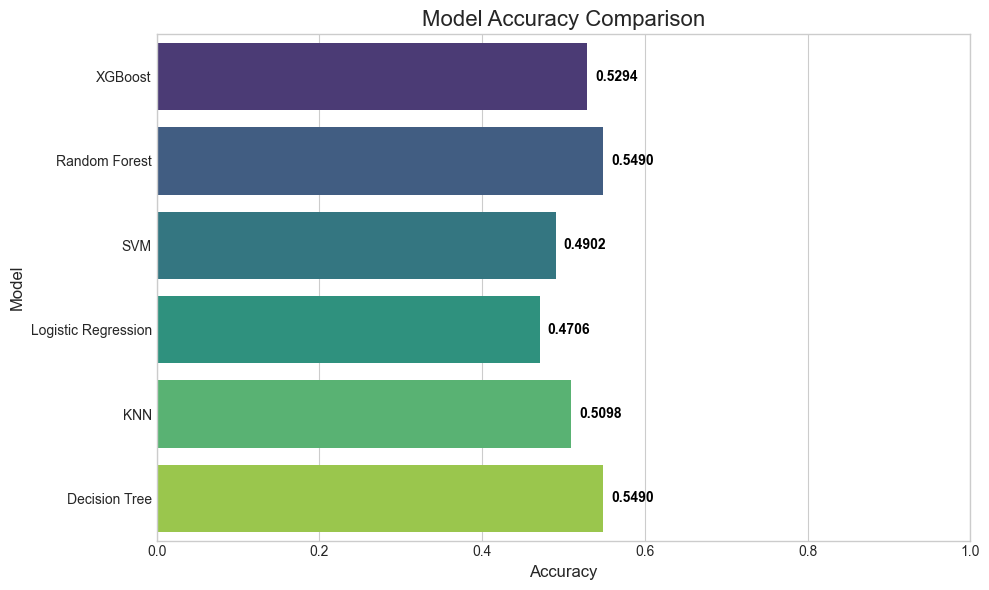

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# --- นำเข้าโมเดล ---
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier  # เพิ่ม Decision Tree
from xgboost import XGBClassifier

# --- วัดผล ---
from sklearn.metrics import classification_report, accuracy_score

# --- 1. โหลดข้อมูล ---
df = pd.read_csv('food_menu.csv')

# --- 2. เพิ่ม Feature Ratio ---
df['category_encoded'] = LabelEncoder().fit_transform(df['category'])
df['sugar_to_carb_ratio'] = df['sugar'] / (df['carbohydrate'] + 1e-8)
df['fat_to_calorie_ratio'] = df['fat'] / (df['calories'] + 1e-8)

# --- 3. เลือก Features และ Target ---
X = df[['calories', 'protein', 'carbohydrate', 'sugar', 'fat', 'sodium',
        'category_encoded', 'sugar_to_carb_ratio', 'fat_to_calorie_ratio']]
y = df['food_type']

# --- 4. Encode target ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 5. Impute missing values ---
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# --- 6. Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- 7. Split data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# --- 8. Oversampling with SMOTE ---
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# --- 9. สร้างโมเดล ---
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=1500,max_depth=20,random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7, metric='euclidean'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# --- 10. ฝึกและประเมินผลทุกโมเดล ---
results = {}

accuracies = []  # เก็บค่า accuracy ของแต่ละโมเดล
model_names = [] # เก็บชื่อโมเดล

for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    
    results[name] = {'accuracy': acc, 'report': report}
    accuracies.append(acc)
    model_names.append(name)
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)

# --- 11. สร้างกราฟเปรียบเทียบประสิทธิภาพ ---
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าสไตล์กราฟ
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))

# สร้างกราฟแท่ง
ax = sns.barplot(x=accuracies, y=model_names, palette="viridis", orient='h')

# เพิ่มข้อมูลบนแท่ง
for i, v in enumerate(accuracies):
    ax.text(v + 0.01, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

# ปรับแต่งกราฟ
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1.0)  # กำหนดช่วงค่า accuracy

# แสดงกราฟ
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)  # บันทึกเป็นไฟล์ภาพ
plt.show()

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:03:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Accuracy: 0.8590
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.84      0.91      0.88        23
       สมดุล       0.80      0.50      0.62        16
  โซเดียมต่ำ       0.80      1.00      0.89        20
    ไขมันต่ำ       1.00      0.95      0.97        19

    accuracy                           0.86        78
   macro avg       0.86      0.84      0.84        78
weighted avg       0.86      0.86      0.85        78

-----------------------------------------------

Random Forest Accuracy: 0.8846
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.91      0.91      0.91        23
       สมดุล       0.83      0.62      0.71        16
  โซเดียมต่ำ       0.91      1.00      0.95        20
    ไขมันต่ำ       0.86      0.95      0.90        19

    accuracy                           0.88        78
   macro avg       0.88      0.87      0.87        78
weighted avg       0.88      0.88

C:\Users\User\AppData\Local\Temp\ipykernel_15444\503635115.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=accuracies, y=model_names, palette="viridis", orient='h')


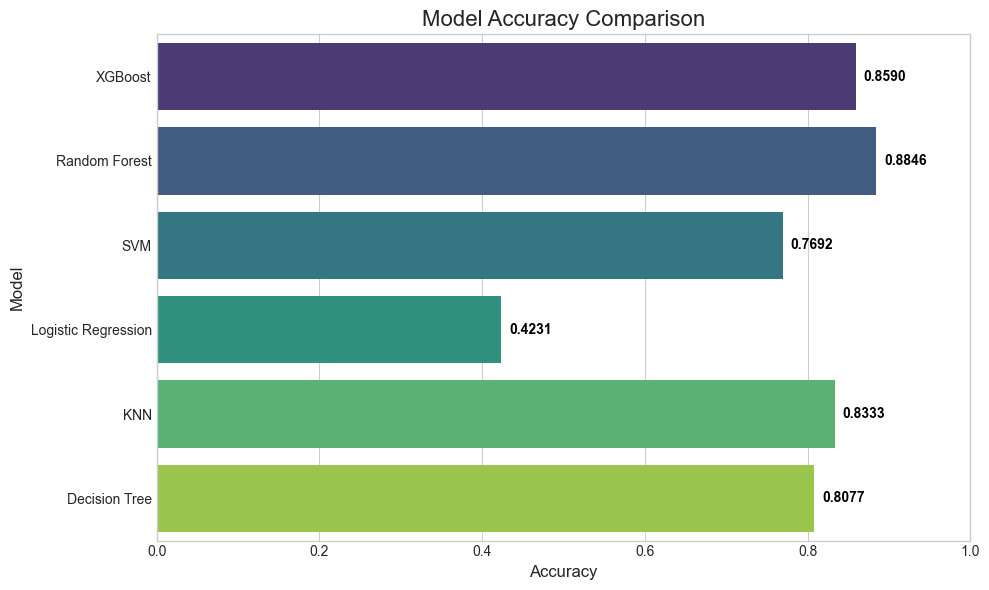

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. โหลดข้อมูล ---
df = pd.read_csv('food_menu.csv')

# --- 2. ปรับสมดุล class โดยการ duplicate class ที่มีน้อย ---
class_counts = df['food_type'].value_counts()
max_count = class_counts.max()
df_balanced = pd.DataFrame()

for food_class, count in class_counts.items():
    class_df = df[df['food_type'] == food_class]
    if count < max_count:
        repeat_factor = int(np.ceil(max_count / count))
        class_df_duplicated = pd.concat([class_df] * repeat_factor, ignore_index=True)
        class_df_balanced = class_df_duplicated.sample(n=max_count, random_state=42)
    else:
        class_df_balanced = class_df
    df_balanced = pd.concat([df_balanced, class_df_balanced], ignore_index=True)

df = df_balanced  # ใช้ dataset ที่บาลานซ์แล้ว

# --- 3. เพิ่ม Feature Ratio ---
df['category_encoded'] = LabelEncoder().fit_transform(df['category'])
df['sugar_to_carb_ratio'] = df['sugar'] / (df['carbohydrate'] + 1e-8)
df['fat_to_calorie_ratio'] = df['fat'] / (df['calories'] + 1e-8)

# --- 4. เลือก Features และ Target ---
X = df[['calories', 'protein', 'carbohydrate', 'sugar', 'fat', 'sodium',
        'category_encoded', 'sugar_to_carb_ratio', 'fat_to_calorie_ratio']]
y = df['food_type']

# --- 5. Encode target ---
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 6. Impute missing values ---
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# --- 7. Scale features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- 8. Split data ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# --- 9. สร้างโมเดล ---
models = {
    "XGBoost": XGBClassifier(
        use_label_encoder=False, 
        eval_metric='mlogloss', 
        n_estimators=300, 
        learning_rate=0.1, 
        max_depth=6, 
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
    "SVM": SVC(
        kernel='rbf', 
        C=5, 
        gamma='scale',  # or try 'auto'
        probability=True, 
        random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        penalty='l2',
        solver='lbfgs', 
        C=1.0, 
        max_iter=2000, 
        random_state=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=5, 
        weights='distance',  # ช่วยให้ sample ใกล้มีน้ำหนักมากกว่า
        metric='euclidean'
    ),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', random_state=42)
}

# --- 10. ฝึกและประเมินผลทุกโมเดล ---
results = {}
accuracies = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    
    results[name] = {'accuracy': acc, 'report': report}
    accuracies.append(acc)
    model_names.append(name)
    
    print(f"\n{name} Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(report)
    print("-----------------------------------------------")

# --- 11. สร้างกราฟเปรียบเทียบประสิทธิภาพ ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracies, y=model_names, palette="viridis", orient='h')

for i, v in enumerate(accuracies):
    ax.text(v + 0.01, i, f"{v:.4f}", color='black', va='center', fontweight='bold')

plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.xlim(0, 1.0)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

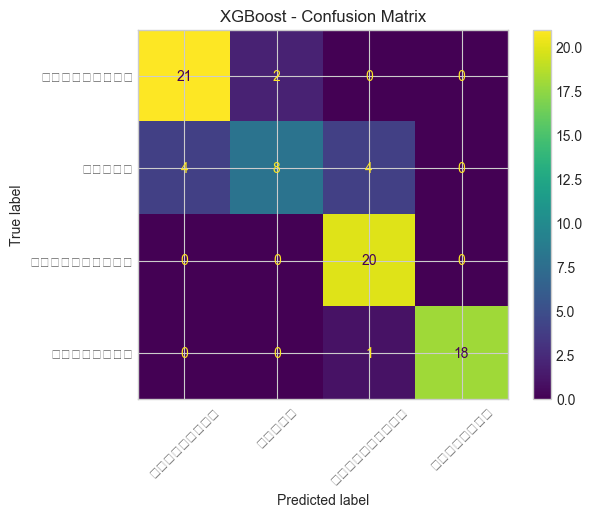

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

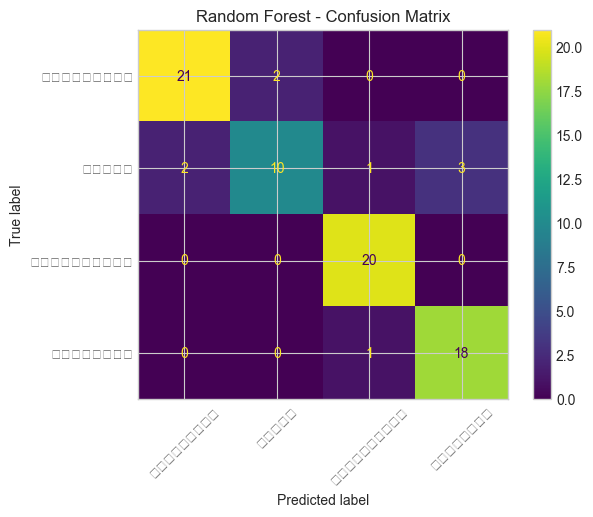

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

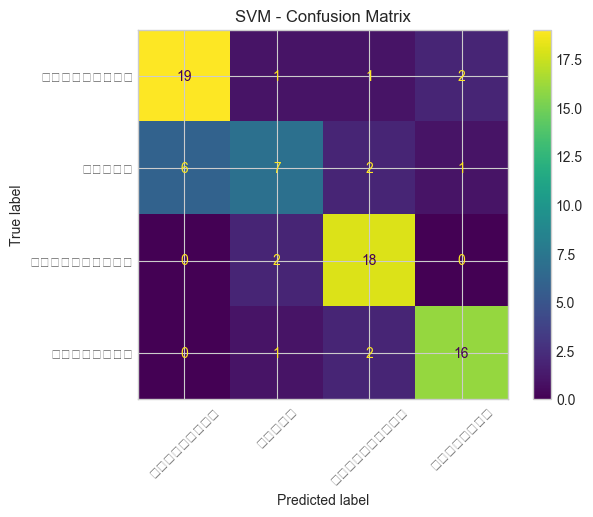

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

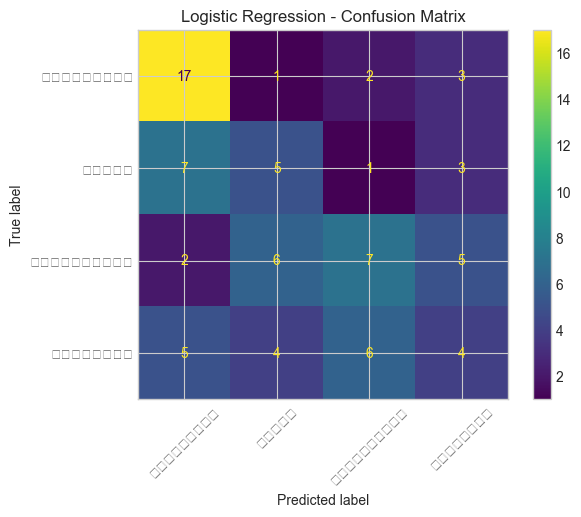

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

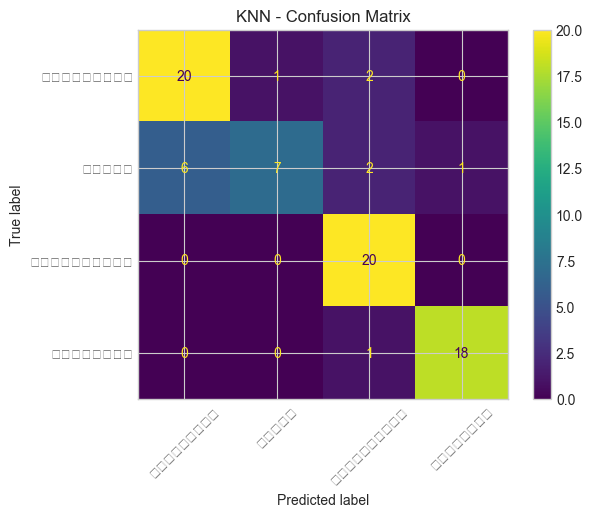

C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3657 (\N{THAI CHARACTER MAI THO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3605 (\N{THAI CHARACTER TO TAO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 3634 (\N{THAI CHARACTER SAR

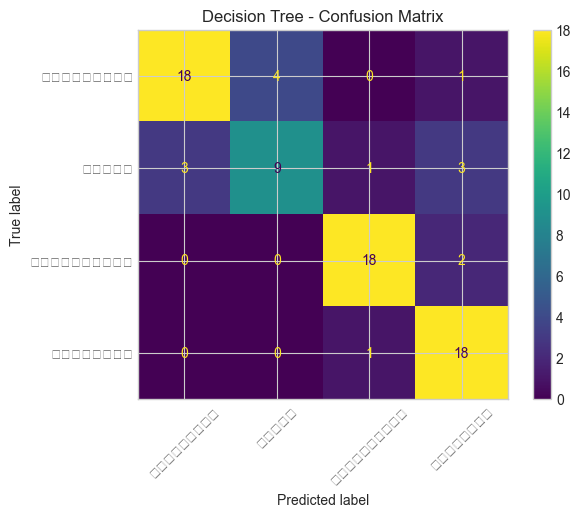

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay

for name, model in models.items():
    y_pred = model.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=le.classes_, xticks_rotation=45)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


Training set size: 160
New test set size: 100


========================= EVALUATE ON NEW DATA =========================


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [22:20:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost - Evaluation on 100 Samples
Accuracy: 0.7800
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.88      0.84      0.86        25
       สมดุล       0.58      0.76      0.66        25
  โซเดียมต่ำ       0.88      0.84      0.86        25
    ไขมันต่ำ       0.89      0.68      0.77        25

    accuracy                           0.78       100
   macro avg       0.81      0.78      0.79       100
weighted avg       0.81      0.78      0.79       100



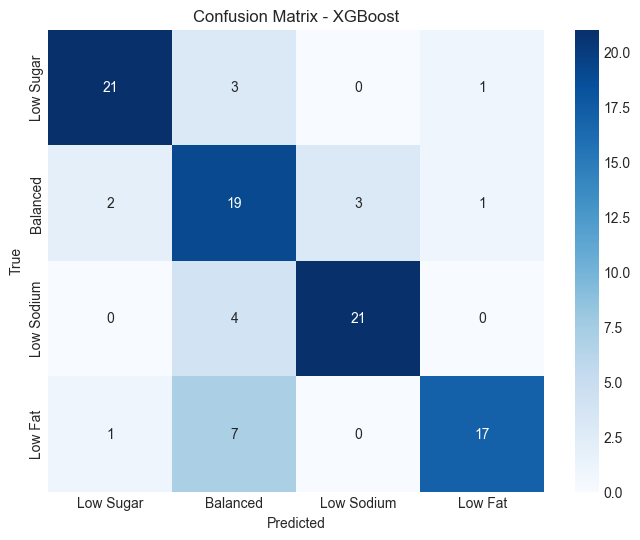

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------

Random Forest - Evaluation on 100 Samples
Accuracy: 0.7800
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.81      0.84      0.82        25
       สมดุล       0.61      0.76      0.68        25
  โซเดียมต่ำ       0.91      0.84      0.88        25
    ไขมันต่ำ       0.85      0.68      0.76        25

    accuracy                           0.78       100
   macro avg       0.80      0.78      0.78       100
weighted avg       0.80      0.78      0.78       100



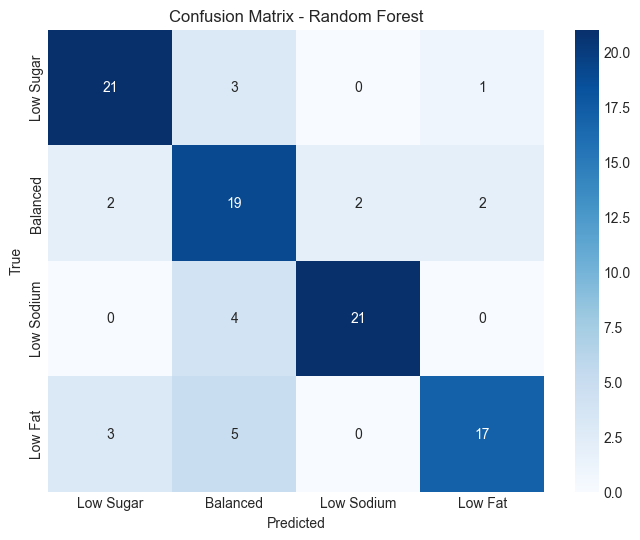

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------

SVM - Evaluation on 100 Samples
Accuracy: 0.7000
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.60      0.84      0.70        25
       สมดุล       0.64      0.56      0.60        25
  โซเดียมต่ำ       0.81      0.68      0.74        25
    ไขมันต่ำ       0.82      0.72      0.77        25

    accuracy                           0.70       100
   macro avg       0.72      0.70      0.70       100
weighted avg       0.72      0.70      0.70       100



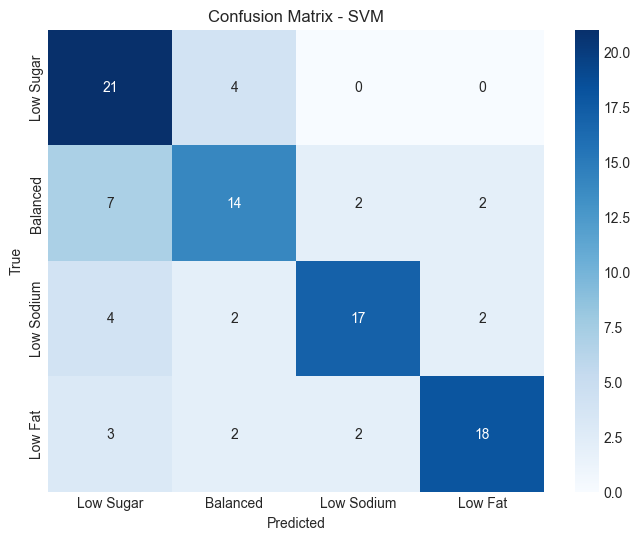

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------

Logistic Regression - Evaluation on 100 Samples
Accuracy: 0.4300
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.53      0.80      0.63        25
       สมดุล       0.41      0.36      0.38        25
  โซเดียมต่ำ       0.35      0.32      0.33        25
    ไขมันต่ำ       0.35      0.24      0.29        25

    accuracy                           0.43       100
   macro avg       0.41      0.43      0.41       100
weighted avg       0.41      0.43      0.41       100



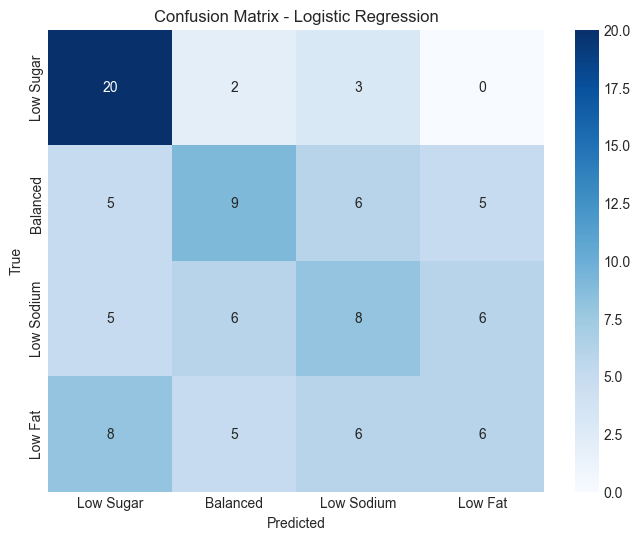

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------

KNN - Evaluation on 100 Samples
Accuracy: 0.7100
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.69      0.88      0.77        25
       สมดุล       0.52      0.44      0.48        25
  โซเดียมต่ำ       0.84      0.84      0.84        25
    ไขมันต่ำ       0.77      0.68      0.72        25

    accuracy                           0.71       100
   macro avg       0.71      0.71      0.70       100
weighted avg       0.71      0.71      0.70       100



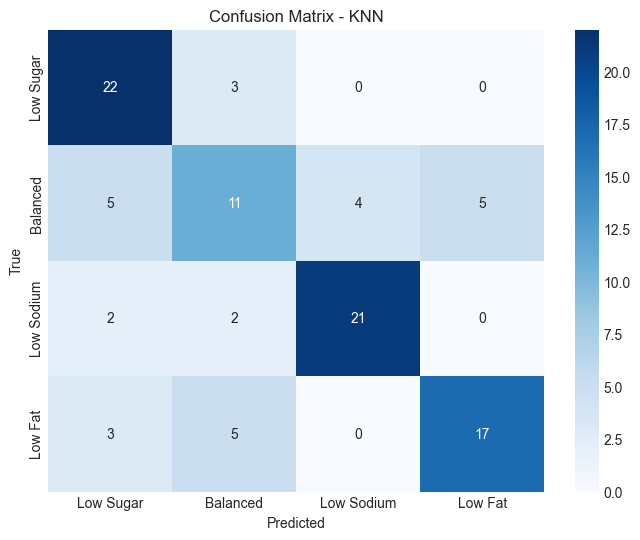

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------

Decision Tree - Evaluation on 100 Samples
Accuracy: 0.7600
Classification Report:
              precision    recall  f1-score   support

   น้ำตาลต่ำ       0.90      0.76      0.83        25
       สมดุล       0.64      0.64      0.64        25
  โซเดียมต่ำ       0.88      0.84      0.86        25
    ไขมันต่ำ       0.67      0.80      0.73        25

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



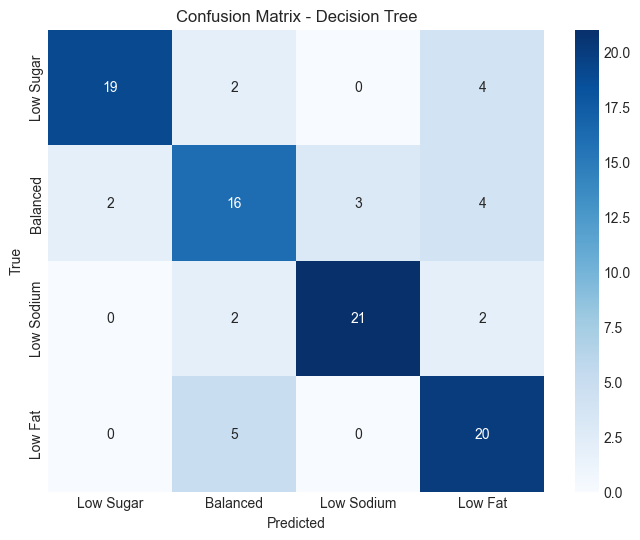

Support per class: {'น้ำตาลต่ำ': np.float64(25.0), 'สมดุล': np.float64(25.0), 'โซเดียมต่ำ': np.float64(25.0), 'ไขมันต่ำ': np.float64(25.0)}
------------------------------------------------------------


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# --- 12. สร้างชุดข้อมูลใหม่ 20 ตัวอย่าง สำหรับทดสอบทุกโมเดล ---
# กำหนด test_size (จำนวนตัวอย่างที่ต้องการในชุดทดสอบ)
test_size = 100

sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42)

for train_index, new_index in sss.split(X_scaled, y_encoded):
    X_for_training, X_new = X_scaled[train_index], X_scaled[new_index]
    y_for_training, y_new = y_encoded[train_index], y_encoded[new_index]

print(f"Training set size: {len(y_for_training)}")
print(f"New test set size: {len(y_new)}")

# --- 13. ทดสอบโมเดลกับข้อมูลใหม่ 20 ตัวอย่าง ---
print("\n\n========================= EVALUATE ON NEW DATA =========================")
for name, model in models.items():
    model.fit(X_for_training, y_for_training)
    y_new_pred = model.predict(X_new)
    
    acc = accuracy_score(y_new, y_new_pred)
    print(f"\n{name} - Evaluation on 100 Samples")
    print(f"Accuracy: {acc:.4f}")
    
    report = classification_report(y_new, y_new_pred, target_names=le.classes_, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_new, y_new_pred, target_names=le.classes_))
    
    cm = confusion_matrix(y_new, y_new_pred)
    # print("Confusion Matrix:")
    # print(cm)
    
    # Plot confusion matrix heatmap
    class_labels_en = ['Low Sugar', 'Balanced', 'Low Sodium', 'Low Fat']

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels_en, yticklabels=class_labels_en)
    
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    support = np.array([report[cls]['support'] for cls in le.classes_])
    print("Support per class:", dict(zip(le.classes_, support)))
    print("-" * 60)




